In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Data Loading



In [ ]:
paths = [
    "/content/data/Ananthapur-redgram.csv",
    "/content/data/Kadapa- Redgram.csv",
    "/content/data/Prakasam-Redgram.csv"
]

In [ ]:
dfs = []
for p in paths:
    df = pd.read_csv(p)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

In [ ]:
data.head()


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Andhra Pradesh,Anantapur,Dharmavaram,Red Gram,Local,FAQ,13-03-2007,1800,1850,1825.0,7
1,Andhra Pradesh,Anantapur,Dharmavaram,Red Gram,Local,FAQ,14-03-2007,1600,1860,1700.0,7
2,Andhra Pradesh,Anantapur,Gooti,Red Gram,Local,FAQ,25-02-2006,1420,1450,1435.0,7
3,Andhra Pradesh,Anantapur,Gooti,Red Gram,Local,FAQ,28-02-2006,1400,1500,1435.0,7
4,Andhra Pradesh,Anantapur,Gooti,Red Gram,Local,FAQ,22-02-2006,1400,1500,1450.0,7


In [ ]:
data.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price',
       'Commodity_Code'],
      dtype='object')

# Data Cleaning and EDA

In [ ]:
data.columns = [c.lower().strip() for c in data.columns]

data['date'] = pd.to_datetime(data['arrival_date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

/tmp/ipython-input-1528425479.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['arrival_date'])


In [ ]:
data = data.sort_values('date')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 19194 entries, 1598 to 3697
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   state           19194 non-null  object        
 1   district        19194 non-null  object        
 2   market          19194 non-null  object        
 3   commodity       19194 non-null  object        
 4   variety         19194 non-null  object        
 5   grade           19194 non-null  object        
 6   arrival_date    19194 non-null  object        
 7   min_price       19194 non-null  int64         
 8   max_price       19194 non-null  int64         
 9   modal_price     19194 non-null  float64       
 10  commodity_code  19194 non-null  int64         
 11  date            19194 non-null  datetime64[ns]
 12  year            19194 non-null  int32         
 13  month           19194 non-null  int32         
 14  day             19194 non-null  int32         
dtypes: da

In [ ]:
print(data.describe())

          min_price     max_price   modal_price  commodity_code  \
count  19194.000000  19194.000000  19194.000000         19194.0   
mean    3619.130718   3746.125612   3682.363199             7.0   
min        0.000000      0.000000      2.250000             7.0   
25%     2550.000000   2700.000000   2620.000000             7.0   
50%     3550.000000   3600.000000   3570.000000             7.0   
75%     4250.000000   4320.000000   4300.000000             7.0   
max    13900.000000  14000.000000  13950.000000             7.0   
std     1569.546839   1570.478040   1567.173625             0.0   

                             date          year         month           day  
count                       19194  19194.000000  19194.000000  19194.000000  
mean   2011-01-22 22:44:54.091904   2010.556268      6.579712     15.799208  
min           2002-08-14 00:00:00   2002.000000      1.000000      1.000000  
25%           2008-09-29 12:00:00   2008.000000      4.000000      8.000000  
50%   

**Yearly Average Price**

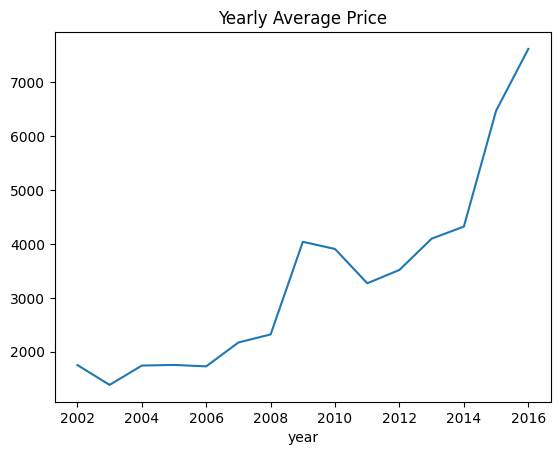

In [ ]:
plt.figure()
data.groupby('year')['modal_price'].mean().plot(title="Yearly Average Price")
plt.show()


<Figure size 640x480 with 0 Axes>

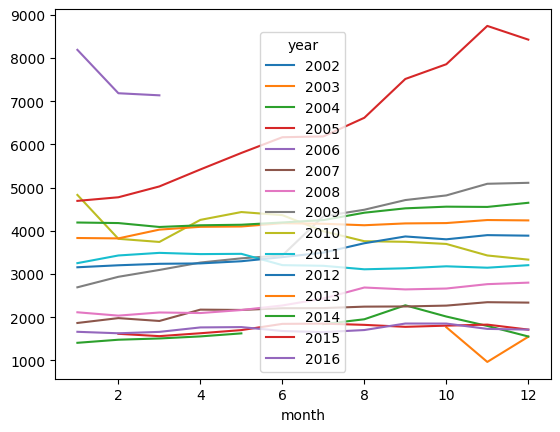

In [ ]:
plt.figure()
data.groupby(['year','month'])['modal_price'].mean().unstack(0).plot()
plt.show()

In [ ]:
daily_avg = data.groupby('date')['modal_price'].mean().reset_index()
monthly_avg = data.groupby(['year','month'])['modal_price'].mean().reset_index()

daily_avg['price_diff'] = daily_avg['modal_price'].diff()
daily_avg['trend'] = (daily_avg['price_diff'] > 0).astype(int)

daily_avg = daily_avg.dropna()

In [ ]:
X = daily_avg[['modal_price']]
y = daily_avg['price_diff']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modelling**

 **Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


 **Random Forest**

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
def print_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(name)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2:", r2)
    print("-"*40)

In [ ]:
print_metrics("Linear Regression", y_test, y_pred_lr)

Linear Regression
MSE: 61371.93382437458
RMSE: 247.73359446061122
MAE: 92.3274329103618
R2: 0.002252892047886923
----------------------------------------


In [ ]:
print_metrics("Random Forest", y_test, y_pred_rf)

Random Forest
MSE: 63859.50042622741
RMSE: 252.7043735795394
MAE: 108.90412529934636
R2: -0.03818843394877214
----------------------------------------


# LSTM


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
dfs = [pd.read_csv(p) for p in paths]
data = pd.concat(dfs, ignore_index=True)

data.columns = [c.lower().strip() for c in data.columns]
data['date'] = pd.to_datetime(data['arrival_date'])
data = data.sort_values('date')

daily = data.groupby('date')['modal_price'].mean().reset_index()
values = daily['modal_price'].values.reshape(-1, 1)

/tmp/ipython-input-3142816716.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['arrival_date'])


In [ ]:
scaler = MinMaxScaler()
values = scaler.fit_transform(values)


In [ ]:
window = 14

X, y = [], []
for i in range(len(values) - window):
    X.append(values[i:i+window])
    y.append(values[i+window])

X = np.array(X)
y = np.array(y)

In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
class PriceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_loader = DataLoader(PriceDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(PriceDataset(X_test, y_test), batch_size=32, shuffle=False)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(1, 64, batch_first=True)
        self.fc = nn.Linear(64, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1])


In [ ]:
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {epoch_loss/len(train_loader)}")


Epoch 1/50 - Train Loss: 0.010752997560193761
Epoch 2/50 - Train Loss: 0.0003779948115698062
Epoch 3/50 - Train Loss: 0.00020563111549563474
Epoch 4/50 - Train Loss: 0.00016435973589977947
Epoch 5/50 - Train Loss: 0.00015407264614623274
Epoch 6/50 - Train Loss: 0.00016077714568382362
Epoch 7/50 - Train Loss: 0.00014605393018428004
Epoch 8/50 - Train Loss: 0.0001617807988077402
Epoch 9/50 - Train Loss: 0.00015817900395632023
Epoch 10/50 - Train Loss: 0.0001497819000724121
Epoch 11/50 - Train Loss: 0.00016081890502391615
Epoch 12/50 - Train Loss: 0.00015159953665715874
Epoch 13/50 - Train Loss: 0.0001594127597854822
Epoch 14/50 - Train Loss: 0.00016606782126473262
Epoch 15/50 - Train Loss: 0.00014859431103104727
Epoch 16/50 - Train Loss: 0.000159364648789051
Epoch 17/50 - Train Loss: 0.00014631891830504173
Epoch 18/50 - Train Loss: 0.00015572890246403403
Epoch 19/50 - Train Loss: 0.000139048906021344
Epoch 20/50 - Train Loss: 0.00014267323500462227
Epoch 21/50 - Train Loss: 0.00014865690

# Evaluation

In [ ]:
model.eval()
preds = []
true = []

with torch.no_grad():
    for xb, yb in test_loader:
        p = model(xb)
        preds.append(p.numpy())
        true.append(yb.numpy())

preds = scaler.inverse_transform(np.vstack(preds))
true = scaler.inverse_transform(np.vstack(true))

mse = mean_squared_error(true, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true, preds)
r2 = r2_score(true, preds)

print("LSTM Metrics")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

LSTM Metrics
MSE: 44430.5390625
RMSE: 210.78552858889532
MAE: 107.61100006103516
R2: 0.98097825050354


In [ ]:
import joblib

In [ ]:
path='/content/Models/lstm_redgram'
torch.save(model.state_dict(), path + "_lstm.pt")
joblib.dump(scaler, path + "_scaler.pkl")

['/content/Models/lstm_redgram_scaler.pkl']

# Inference

In [ ]:
def load_model(model, scaler_path, model_path):
    model.load_state_dict(torch.load(model_path))
    scaler = joblib.load(scaler_path)
    model.eval()
    return model, scaler

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import joblib

def run_year_analysis(year, csv_paths, model_path, scaler_path, window=14):
    dfs = [pd.read_csv(p) for p in csv_paths]
    data = pd.concat(dfs, ignore_index=True)
    data.columns = [c.lower().strip() for c in data.columns]
    data['date'] = pd.to_datetime(data['arrival_date'])
    data = data.sort_values('date')

    daily = data.groupby('date')['modal_price'].mean().reset_index()
    daily['year'] = daily['date'].dt.year

    scaler = joblib.load(scaler_path)

    class LSTMModel(torch.nn.Module):
        def __init__(self):
            super().__init__()
            self.lstm = torch.nn.LSTM(1, 64, batch_first=True)
            self.fc = torch.nn.Linear(64, 1)
        def forward(self, x):
            out, _ = self.lstm(x)
            return self.fc(out[:, -1])

    model = LSTMModel()
    model.load_state_dict(torch.load(model_path))
    model.eval()

    last_prices = daily['modal_price'].values[-window:].reshape(-1,1)
    last_scaled = scaler.transform(last_prices)

    days = 365
    preds = []
    window_data = last_scaled.copy()

    for _ in range(days):
        x = torch.tensor(window_data, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            p = model(x).numpy()
        preds.append(p[0,0])
        window_data = np.vstack([window_data[1:], p])

    preds = scaler.inverse_transform(np.array(preds).reshape(-1,1)).flatten()

    dates = pd.date_range(start=f"{year}-01-01", periods=days)
    pred_df = pd.DataFrame({"date": dates, "predicted_price": preds})
    pred_df['month'] = pred_df['date'].dt.month

    daily_avg = pred_df.groupby('date')['predicted_price'].mean()
    monthly_avg = pred_df.groupby('month')['predicted_price'].mean()
    yearly_avg = pred_df['predicted_price'].mean()

    trend = "UP" if preds[-1] > preds[0] else "DOWN"

    print("Year:", year)
    print("Predicted Yearly Average Price:", yearly_avg)
    print("Trend:", trend)
    print("\nMonthly Average Prices")
    print(monthly_avg)

    plt.figure()
    daily_avg.plot(title=f"Daily Price Prediction {year}")
    plt.show()

    plt.figure()
    monthly_avg.plot(kind="bar", title=f"Monthly Average Price {year}")
    plt.show()

    return pred_df


**prediction for 2026**

/tmp/ipython-input-2755950865.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['arrival_date'])


Year: 2026
Predicted Yearly Average Price: 7841.748
Trend: UP

Monthly Average Prices
month
1     7365.009766
2     7587.139160
3     7732.876465
4     7828.659668
5     7886.905762
6     7921.889160
7     7942.552734
8     7954.887207
9     7961.975098
10    7966.107910
11    7968.528809
12    7969.937500
Name: predicted_price, dtype: float32


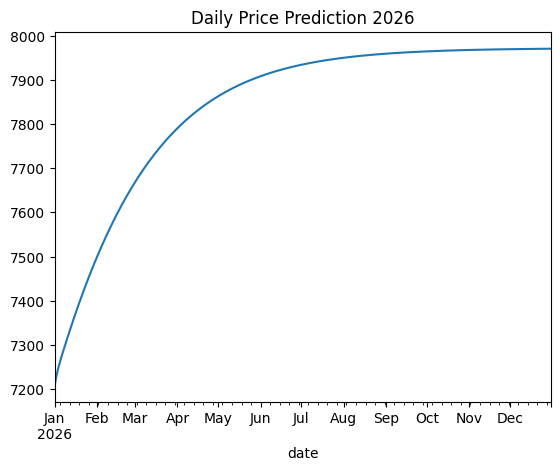

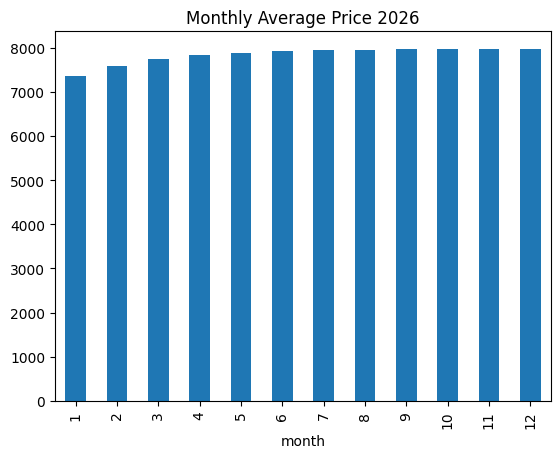

In [ ]:
predictions = run_year_analysis(
    year=2026,
    csv_paths=paths,
    model_path="/content/Models/lstm_redgram_lstm.pt",
    scaler_path="/content/Models/lstm_redgram_scaler.pkl"
)